## PROYECTO 2: DATA ANALYTICS
### **Análisis Integral de Criptomonedas: Explorando Oportunidades de Inversión en un Mercado Volátil**
##### *By JUAN CAMILO CANDELA   CALI-COL*


##### **¿Por qué se considera la compra y venta de criptomonedas como una inversión atractiva?** 
Las criptomonedas han revolucionado la manera en que concebimos las transacciones financieras y la inversión. Como activos digitales descentralizados y seguros, ofrecen la posibilidad de realizar transacciones globales de forma eficiente y sin intermediarios. Esta tecnología ha atraído la atención de inversores y entusiastas, ya que brinda la oportunidad de diversificar sus carteras y capitalizar en un mercado en constante evolución. La combinación de su volatilidad y el potencial de crecimiento a largo plazo ha convertido a las criptomonedas en una opción intrigante para quienes buscan nuevas oportunidades de inversión.

In [52]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener data de las 20 critomonedas con más volumen de transacciones desde la API CoinGecko
def get_crypto_data():
    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        "vs_currency": "usd",
        "order": "total_volume_desc",
        "per_page": 20,
        "price_change_percentage":"7d,30d,200d,1y",
        "page": 1,
        "sparkline": False
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data

crypto_data = get_crypto_data()

# Paso 2: Creación de un DataFrame
crypto_df = pd.DataFrame(crypto_data)
crypto_df.head()


,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,price_change_percentage_1y_in_currency,price_change_percentage_200d_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_7d_in_currency
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26034.000000,506745160274,1,546628026073,11830768413,26200.000000,...,2021-11-10T14:24:11.849Z,67.810000,38294.59123,2013-07-06T00:00:00.000Z,None,2023-08-25T23:33:37.878Z,20.468764,13.650984,-11.632140,-0.122706
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1653.510000,198663418088,2,198663418088,7105362526,1664.660000,...,2021-11-10T14:24:19.604Z,0.432979,381800.58017,2015-10-20T00:00:00.000Z,"{'times': 83.91847724577327, 'currency': 'btc'...",2023-08-25T23:33:44.250Z,-2.642409,1.160189,-11.579673,-0.530377
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999570,82813511082,3,82813511082,12800312803,1.002000,...,2018-07-24T00:00:00.000Z,0.572521,74.59265,2015-03-02T00:00:00.000Z,None,2023-08-25T23:30:00.380Z,-0.153931,-0.079396,-0.083796,0.000133
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,217.910000,33527530586,4,43582957960,383231226,219.050000,...,2021-05-10T07:24:17.097Z,0.039818,547336.61315,2017-10-19T00:00:00.000Z,None,2023-08-25T23:33:40.040Z,-27.852971,-33.310907,-8.824350,0.791900
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.525614,27778877984,5,52497970997,928408901,0.529816,...,2018-01-07T00:00:00.000Z,0.002686,19442.45619,2014-05-22T00:00:00.000Z,None,2023-08-25T23:33:40.404Z,50.459712,32.268787,-26.745458,3.749129


Para abordar este tema tan complejo, decidí buscar una data que me permitiera buscar métricas importantes en la elección de una criptomoneda para una posible inversión. Desde la API de coinGecko obtenemos las 20 criptomonedas con mayor unidades negociadas en las últimas 24 horas

In [53]:

# Ordenamos el DataFrame en orden descendente según la columna total_volume, para identificar un top20
df_sorted = crypto_df.sort_values(by="total_volume", ascending=False)
print(df_sorted)

                  id symbol               name  \
2             tether   usdt             Tether   
0            bitcoin    btc            Bitcoin   
1           ethereum    eth           Ethereum   
5           usd-coin   usdc           USD Coin   
4             ripple    xrp                XRP   
3        binancecoin    bnb                BNB   
14          litecoin    ltc           Litecoin   
9             solana    sol             Solana   
12     matic-network  matic            Polygon   
8           dogecoin   doge           Dogecoin   
7            cardano    ada            Cardano   
10              tron    trx               TRON   
15         shiba-inu   shib          Shiba Inu   
18      bitcoin-cash    bch       Bitcoin Cash   
11          polkadot    dot           Polkadot   
17               dai    dai                Dai   
16   wrapped-bitcoin   wbtc    Wrapped Bitcoin   
13  the-open-network    ton            Toncoin   
6       staked-ether  steth  Lido Staked Ether   


In [54]:
# Seleccionamos las columnas para nuestro primer análisis y modifficamos el nombre de unas columnas

selected_columns = ["id", "symbol", "name", "current_price", "total_volume", "high_24h", "low_24h", "price_change_percentage_24h", "price_change_percentage_7d_in_currency", "price_change_percentage_30d_in_currency", "price_change_percentage_200d_in_currency", "price_change_percentage_1y_in_currency"]
objective_df = crypto_df[selected_columns]
column_mask = {
    "id": "ID",
    "symbol": "Symbol",
    "name": "name",
    "current_price": "Current_price",
    "total_volume": "total_volume",
    "high_24h": "Highest_price_24h",
    "low_24h": "Lowest_price_24h",
    "price_change_percentage_24h": "24hours_change(%)",
    "price_change_percentage_7d_in_currency": "7days_change(%)",
    "price_change_percentage_30d_in_currency": "30days_change(%)",
    "price_change_percentage_200d_in_currency": "6months_change(%)",
    "price_change_percentage_1y_in_currency": "1year_change(%)"
}

objective_df.rename(columns=column_mask, inplace=True)
objective_df.head()

C:\Users\jccan\AppData\Local\Temp\ipykernel_15100\3041725719.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objective_df.rename(columns=column_mask, inplace=True)


,ID,Symbol,name,Current_price,total_volume,Highest_price_24h,Lowest_price_24h,24hours_change(%),7days_change(%),30days_change(%),6months_change(%),1year_change(%)
0,bitcoin,btc,Bitcoin,26034.000000,11830768413,26200.000000,25820.000000,-0.27803,-0.122706,-11.632140,13.650984,20.468764
1,ethereum,eth,Ethereum,1653.510000,7105362526,1664.660000,1636.870000,-0.07444,-0.530377,-11.579673,1.160189,-2.642409
2,tether,usdt,Tether,0.999570,12800312803,1.002000,0.998312,0.00937,0.000133,-0.083796,-0.079396,-0.153931
3,binancecoin,bnb,BNB,217.910000,383231226,219.050000,214.120000,0.08517,0.791900,-8.824350,-33.310907,-27.852971
4,ripple,xrp,XRP,0.525614,928408901,0.529816,0.508245,1.64547,3.749129,-26.745458,32.268787,50.459712


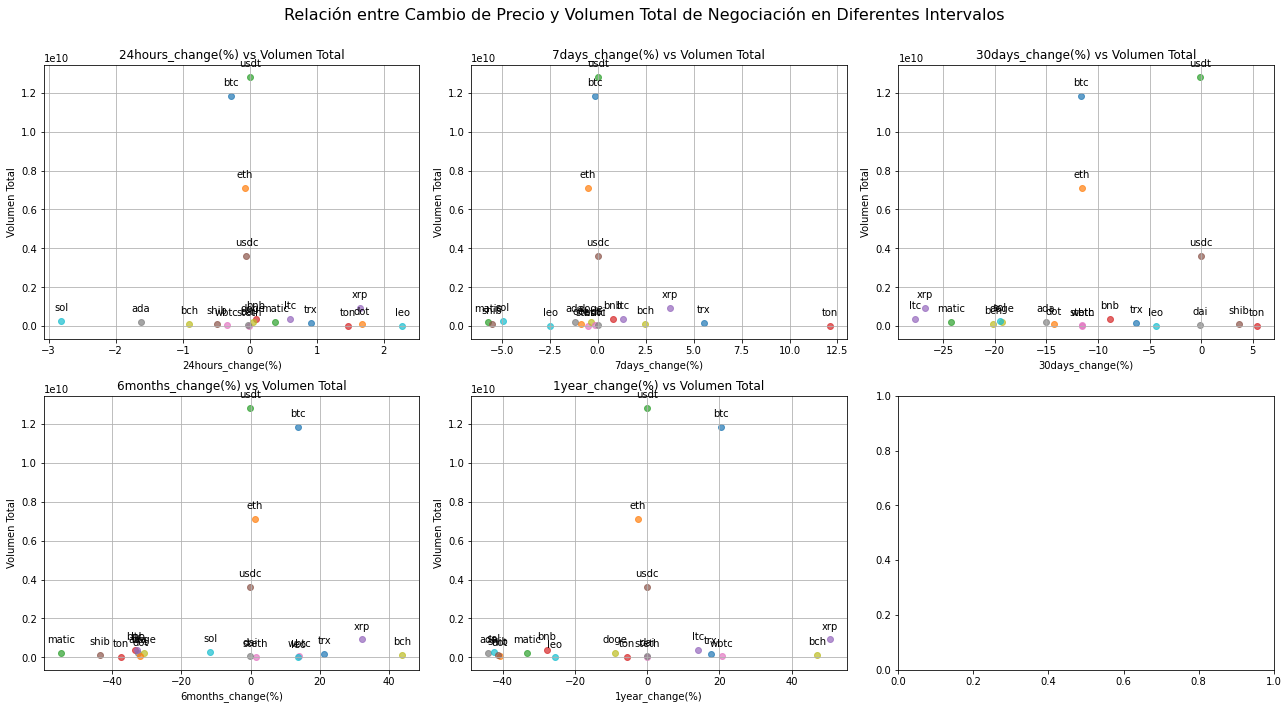

In [55]:
import matplotlib.pyplot as plt


# Lista de columnas de porcentaje de cambio de precios
percentage_columns = [
    "24hours_change(%)",
    "7days_change(%)",
    "30days_change(%)",
    "6months_change(%)",
    "1year_change(%)"
]

# Crear subplots para comparar los scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Relación entre Cambio de Precio y Volumen Total de Negociación en Diferentes Intervalos", fontsize=16)

for i, column in enumerate(percentage_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    x = objective_df[column]
    y = objective_df["total_volume"]
    
    # Agregar el nombre de la criptomoneda como etiqueta encima de cada punto
    for index, row_data in objective_df.iterrows():
        ax.scatter(x.loc[index], y.loc[index], alpha=0.7)
        ax.annotate(row_data["Symbol"], (x.loc[index], y.loc[index]), textcoords="offset points", xytext=(0,10), ha='center')
    
    ax.set_title(f"{column} vs Volumen Total")
    ax.set_xlabel(column)
    ax.set_ylabel("Volumen Total")
    ax.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


#### Explicación:
##### Estaba tratando de evidenciar algún compartamiento directamente relacionado a la variabilidad del precio de las cripto, con respecto a su impacto en la cantidad total de unidades de la misma que se han comprado o vendido en el mercado durante un período específico. Y de esta forma sabemos que durante el último año el USDT se mantiene como el más preferido, debido a que es practicamente un Dólar digital.

##### También se puede evidenciar que el BTC (Bitcoin) y el ETH (Ethereum), mantienen un compartamiento similar, a través del tiempo. Ahora bien sería interesante observar porque un USDC a pesar de ser considerada como una stablecoin respaldada por dinero fiduciario que además cuenta con el respaldo de ratificaciones mensuales transparentes; no cuenta con un volumen de movimiento similar a las primeras 3. Teniendo en cuenta que Cada USDC tiene una garantía muy alta sustentada en efectivo y por bonos del Tesoro de EE. UU.

In [56]:
import requests
import pandas as pd
from datetime import datetime

# Lista de pares de criptomonedas (BTCUSDT, ETHUSDT, USDCUSDT)
pairs = ["BTCUSDT", "ETHUSDT", "USDCUSDT"]

# Fecha Inicio - Enero 2020
start_time = int(datetime(2020, 1, 1).timestamp() * 1000)  # Convertir a milisegundos

# URL base de la API de Binance y creacion de dataframe
base_url = "https://api.binance.com/api/v3/klines"
crypto_data = pd.DataFrame()

for pair in pairs:
    # Parámetros para la solicitud a la API
    params = {
        "symbol": pair,
        "interval": "1d",    # Intervalo de tiempo de 1 día
        "startTime": start_time,
        "limit": 1000        # Número máximo de velas por solicitud
    }
    
    # Realizar la solicitud a la API
    response = requests.get(base_url, params=params)
    data = response.json()
    
    # Crear un DataFrame con los datos
    temp_df = pd.DataFrame(data, columns=["Timestamp", "Open", "High", "Low", "Close", "Volume", "Close Time",
                                          "Quote Asset Volume", "Number of Trades", "Taker Buy Base Asset Volume",
                                          "Taker Buy Quote Asset Volume", "Ignore"])
    
    # Agregar el nombre del par de criptomonedas al DataFrame y unión del DataFrame temporal al DataFrame principal
    temp_df["Pair"] = pair
    crypto_data = pd.concat([crypto_data, temp_df], ignore_index=True)

# Convertir la columna de Timestamp a formato datetime
crypto_data["Timestamp"] = pd.to_datetime(crypto_data["Timestamp"], unit="ms")

# Exportar data .csv
crypto_data.to_csv("crypto_historical_prices.csv", index=False)

print("Datos de precios históricos guardados en 'crypto_historical_prices.csv'")



Datos de precios históricos guardados en 'crypto_historical_prices.csv'


#### Binance DataSet
##### Con el fin de aprovechar la información de otras fuentes, procedemos a descargar un dataset desde la API de Binance, donde conseguiremos el precio histórico desde el 2020 hasta la actualidad, de las cripto BTC, ETH y USDC, en valor de USDT (Dólares Digitales)

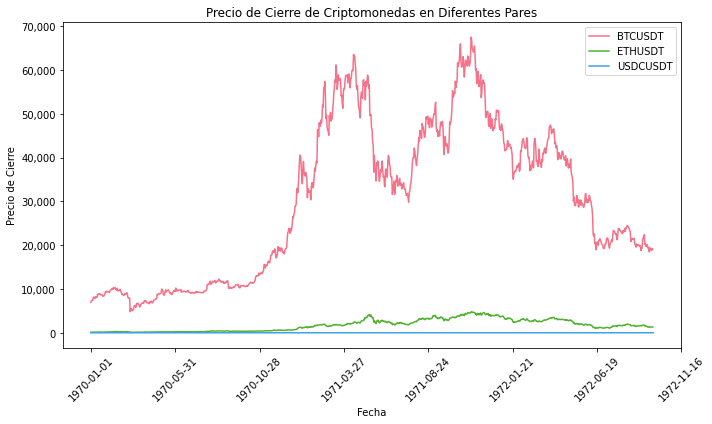

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# Cargar los datos del CSV
data = pd.read_csv("crypto_historical_prices.csv")

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Colores para cada par
colors = sns.color_palette("husl", n_colors=len(data['Pair'].unique()))

# Graficar cada par con un color diferente
for idx, pair in enumerate(data['Pair'].unique()):
    pair_data = data[data['Pair'] == pair]
    plt.plot(pair_data['Timestamp'], pair_data['Close'], label=pair, color=colors[idx])

# Personalizar ejes y leyendas
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.title("Precio de Cierre de Criptomonedas en Diferentes Pares")
plt.legend()
plt.xticks(rotation=45)

# Formatear el eje X con fechas más legibles
date_form = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

# Formatear el eje Y con separación de miles y valores
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Mostrar la gráfica
plt.tight_layout()
plt.show()



#### Explicación
##### Cada par de criptomonedas muestra cuántas unidades de la criptomoneda base (USDT) se necesitan para comprar una unidad de la criptomoneda cotizada (en este caso, BTC, ETHEREUM y USDC). La información sobre el precio en el par de criptomonedas es esencial para comprender cómo se valoran las criptomonedas entre sí en el mercado de intercambio. Sin embargo debido a la enorme diferencia de precios entre BTC y USDC vamos a realizar graficas separadas

C:\Users\jccan\AppData\Local\Temp\ipykernel_15100\2462388529.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Timestamp"] = pd.to_datetime(filtered_data["Timestamp"])


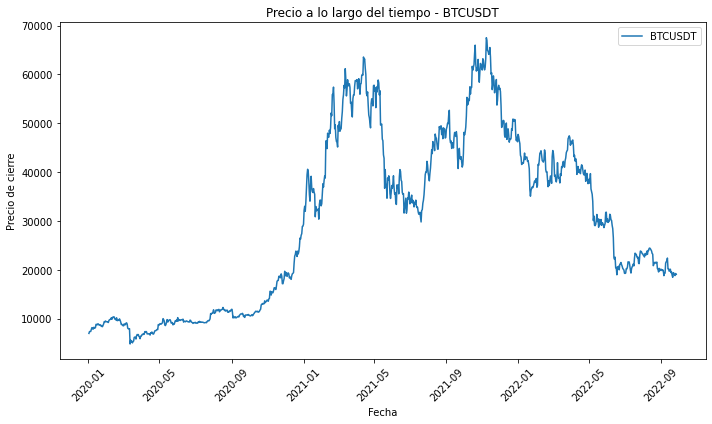

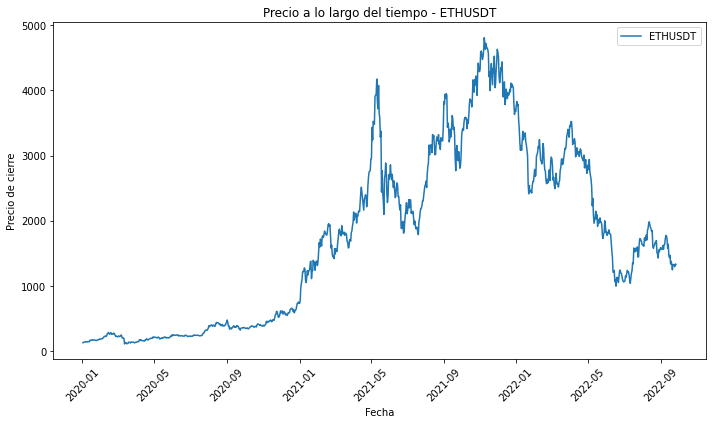

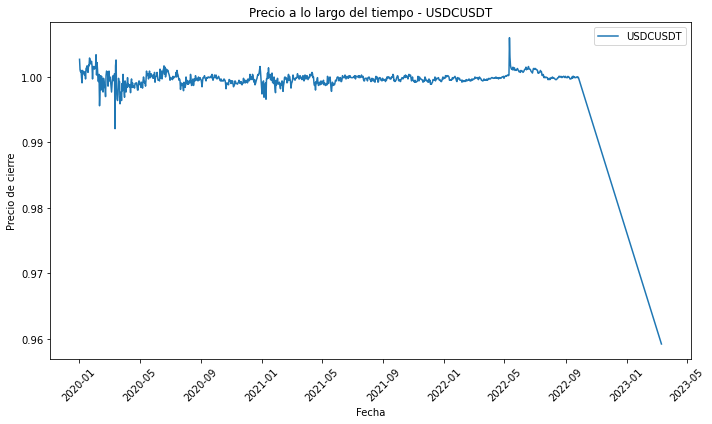

In [58]:

# Cargar los datos desde el archivo CSV
data = pd.read_csv("crypto_historical_prices.csv")

# Filtrar las columnas necesarias
filtered_data = data[["Timestamp", "Close", "Pair"]]

# Convertir la columna Timestamp a formato de fecha
filtered_data["Timestamp"] = pd.to_datetime(filtered_data["Timestamp"])

# Obtener la lista de pares únicos
unique_pairs = filtered_data["Pair"].unique()

# Crear un gráfico de línea para cada par
for pair in unique_pairs:
    pair_data = filtered_data[filtered_data["Pair"] == pair]
    plt.figure(figsize=(10, 6))
    plt.plot(pair_data["Timestamp"], pair_data["Close"], label=pair)
    plt.title(f"Precio a lo largo del tiempo - {pair}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de cierre")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Explicación
##### Aparte de la volatilidad en los precios del BTC y el  ETH, esta grafica nos permite analizar un poco más a fondo que es lo que significa un stablecoin. El USDC jamás se podría mirar como una posible oportunidad de Negocio. Es decir en la actividad del Trading por ejemplo lo que se busca en terminos generales es 'comprar económico y vender caro' aunque es una expresión muy básica, define en gran parte esta actividad.

##### Por consiguiente una de las posibles causas de que el criptomonedas como el BTC y el ETH  tengan una mayor volumen de unidades negociadas en los ultimos años que una de las principales stablecoin. Es muy pronto para definir que la principal causa de que el Volumen Total sea mayor en base a las ganancias que pueda generarse debido a su comercio y transaccionalidad diaria mediante actividades como el trading; sin embargo si influye bastante.


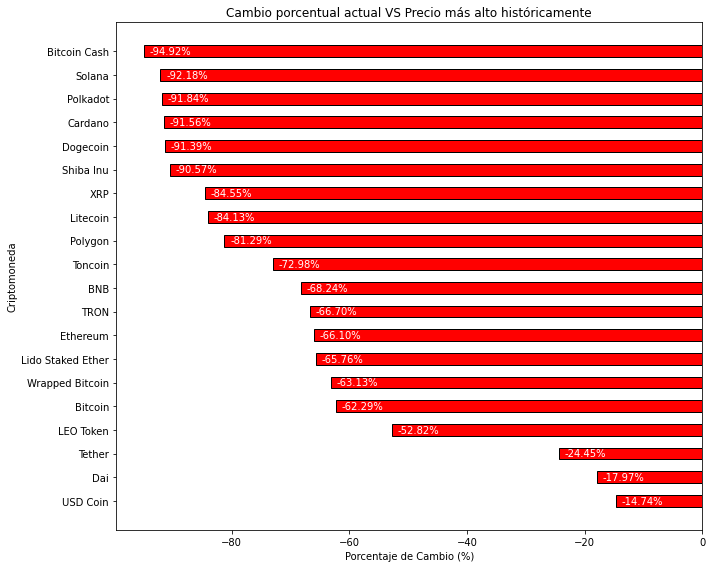

Promedio de cambio de ATH: -68.88%


In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Ordenar el DataFrame por el porcentaje de cambio del ATH de mayor a menor
sorted_crypto_df = crypto_df.sort_values(by='ath_change_percentage', ascending=False)

# Crear una figura y un subgráfico
fig, ax = plt.subplots(figsize=(10, 8))

# Gráfico de barras para ATH Change Percentage
bars = ax.barh(sorted_crypto_df['name'], sorted_crypto_df['ath_change_percentage'], color='red', edgecolor='black', height=0.5)
ax.set_title('Cambio porcentual actual VS Precio más alto históricamente')
ax.set_xlabel('Porcentaje de Cambio (%)')
ax.set_ylabel('Criptomoneda')

# Mostrar los porcentajes en las barras (redondeados a 2 decimales)
for bar in bars:
    value = bar.get_width()
    ax.text(value + 1, bar.get_y() + bar.get_height() / 2, f'{value:.2f}%', color='white', va='center')

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Calcular el promedio de los porcentajes de cambio del ATH
average_ath_change_percentage = crypto_df['ath_change_percentage'].mean()
print(f"Promedio de cambio de ATH: {average_ath_change_percentage:.2f}%")



#### Explicación 
En pleno 2023 sabemos que las personas están participando en la compra y venta de criptomonedas a pesar de la alta volatilidad y el riesgo asociado debido a varias razones. Primero, las criptomonedas han demostrado un potencial significativo para generar ganancias sustanciales en un corto período de tiempo. Aunque existe la posibilidad de pérdidas considerables, el atractivo de obtener retornos masivos ha llevado a muchos inversores a considerarlas como una oportunidad para aumentar sus inversiones.

Esto es totalmente entendible de que a mayor riesgo, mayores ganancias. Lo curioso que, en teoría, aqui vemos las 20 criptomonedas con mayor unidades comercializadas, por consiguiente, partiendo de un supuesto, las personas que invierten en estas criptodivisas tienen la probabilidad de que tengan manejen una criptomoneda que el día de mañana podria desvalorizarse en un 68%.